<a href="https://colab.research.google.com/github/MoiseevMikhail/ML_DEV_course_v1/blob/master/Fastai_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 1. Знакомство с fastai

Убедитесь, что у вас подключен GPU: *Runtime -> Change runtime type -> Hardware accelerator*

Импортируем библиотеку

In [0]:
from fastai import *
from fastai.vision import *

Воспользуемся одним из подготовленных датасетов - он содержит несколько тысяч фотографий собак и кошек. Функция *untar_data* скачает датасет по ссылке *URLs.DOGS* и положит его в папку *dest*. При этом вернет объект *PosixPath* - класса для работы со ссылками.

In [5]:
data_path = untar_data(URLs.DOGS, dest = '/content/datasets/dogscats')
data_path

PosixPath('/content/datasets/dogscats/dogscats')

Структура данных следующая:



```
data_path\
          train\
              class1\
              class2\
          ...
          valid\
              class1\
              class2\
```


     

Убедимся в этом с помощью метода *ls()*

In [6]:
data_path.ls()

[PosixPath('/content/datasets/dogscats/dogscats/test1'),
 PosixPath('/content/datasets/dogscats/dogscats/valid'),
 PosixPath('/content/datasets/dogscats/dogscats/sample'),
 PosixPath('/content/datasets/dogscats/dogscats/train')]

In [7]:
(data_path/'train').ls()

[PosixPath('/content/datasets/dogscats/dogscats/train/cats'),
 PosixPath('/content/datasets/dogscats/dogscats/train/dogs')]

Теперь, когда данные скачаны, подготовим их для подачи в модель. Если структура папки с картинками такая, как в нашем примере, это делается с помощью одной функции:

In [0]:
data = ImageDataBunch.from_folder(data_path, size=224, bs=32).normalize(imagenet_stats)

Мы указываем путь к данным и размер, к которому будут приведены файлы. *normalize(imagenet_stats)* нормализует значения пикселей (вычитает среднее и делит на среднеквадратичное отклонение) отдельно для каждого канала, чтобы распределение совпадало с данными ImageNet

Теперь посмотрим на фото:

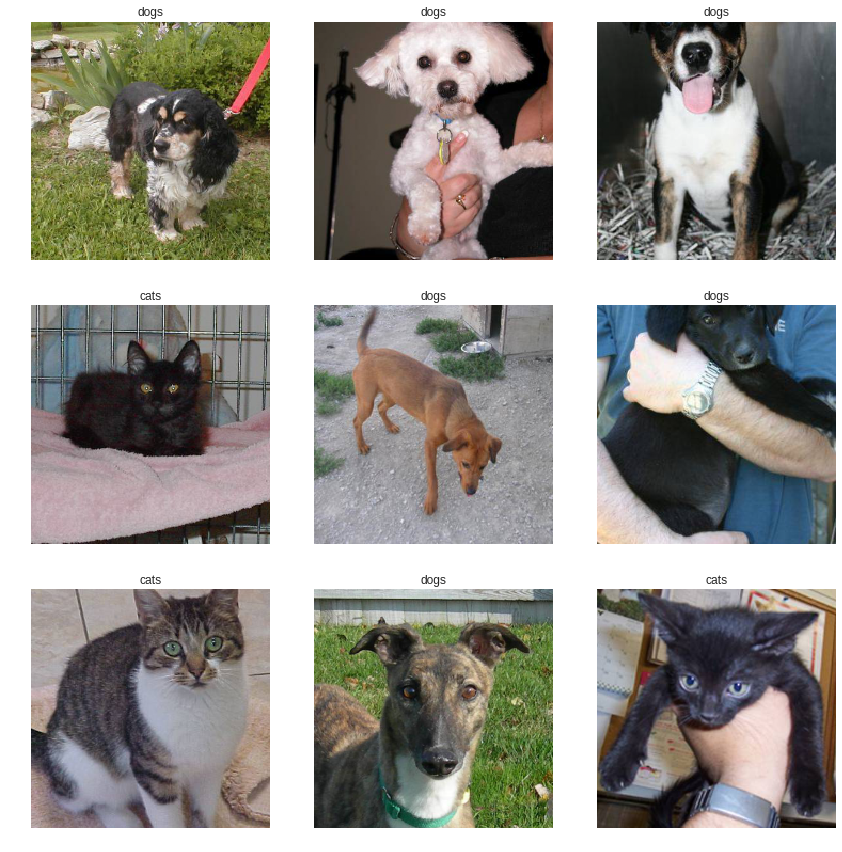

In [0]:
data.show_batch(rows=3)

Данные готовы, пора создать модель. Это тоже делается очень просто:

In [0]:
learn = create_cnn(data, models.resnet34, metrics=[accuracy])

Здесь мы указываем, на каких данных учимся, *архитектуру* нейронной сети, и какие метрики будем использовать при валидации.
Что такое архтиектура? Вот:

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

Здесь выведена вся последовательность *слоёв* модели resnet34.

Теперь мы можем начать обучение

In [0]:
learn.fit_one_cycle(2)

За 9 минут мы получаем классификатор, который распознает кошек и собак с точностью > 99%. Попробуем еще улучшить результат:

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


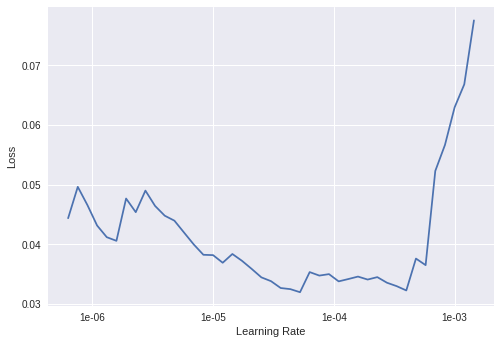

In [0]:
learn.recorder.plot()

До этого большая часть слоев модели была *заморожена* - позднее мы подробнее разберем, что это значит. Теперь мы их *разморозили* и продолжаем обучение с меньшим *learning rate* , или *шагом*

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Посмотрим на результа:

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

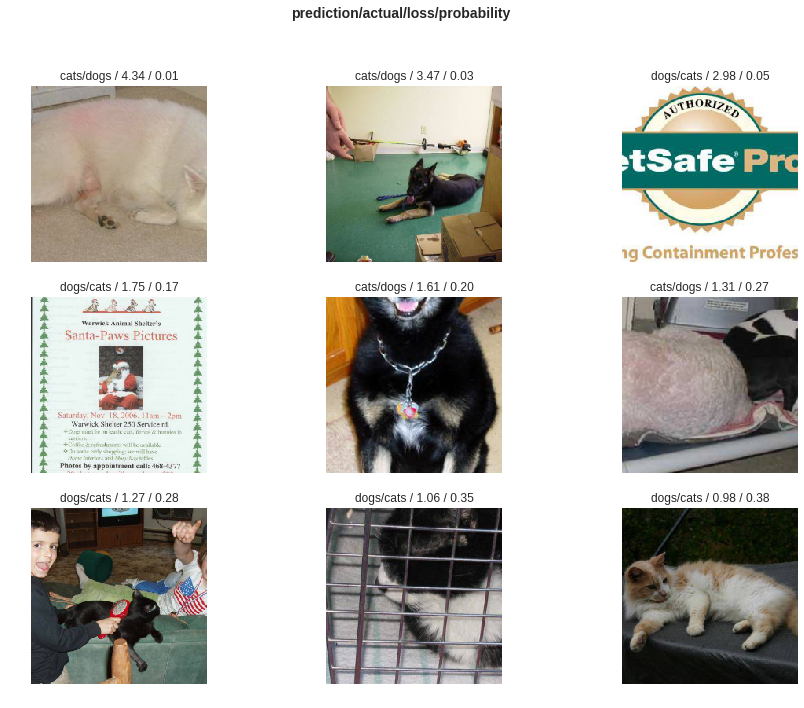

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

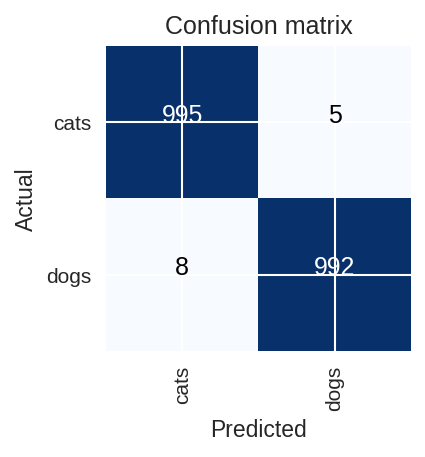

In [0]:
interp.plot_confusion_matrix(figsize=(3,3))

# Аугментация данных

https://docs.fast.ai/vision.transform.html

In [0]:
tfms = get_transforms()

In [0]:
data = ImageDataBunch.from_folder(data_path, size=224, bs=32, ds_tfms = tfms).normalize(imagenet_stats)

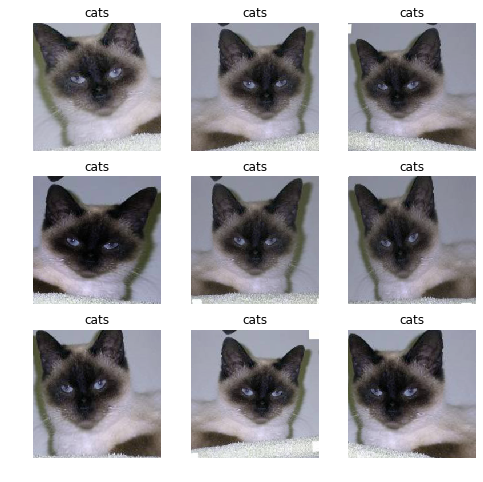

In [15]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

# Обучение на своих данных

Установим скрипт для скачки фото из поиска гугла

In [0]:
!pip install google_images_download

Я попробовал скачать и распознать рисунки разных жанров:

In [0]:
!googleimagesdownload --keywords "realism" --limit 100 --size medium --output_directory '/content/pictures/'

Для лимита >100 требуется установленный chrome, но можно просто сделать еще один запрос с другим размером изображения

In [0]:
!googleimagesdownload --keywords "realism" --limit 100 --size medium --output_directory '/content/pictures/'

In [0]:
!googleimagesdownload --keywords "cubism" --limit 100 --size large --output_directory '/content/pictures/'

In [0]:
data = ImageDataBunch.from_folder(Path('/content/pictures'), valid_pct=0.25, size=224, bs=8, ds_tfms=get_transforms()).normalize(imagenet_stats)

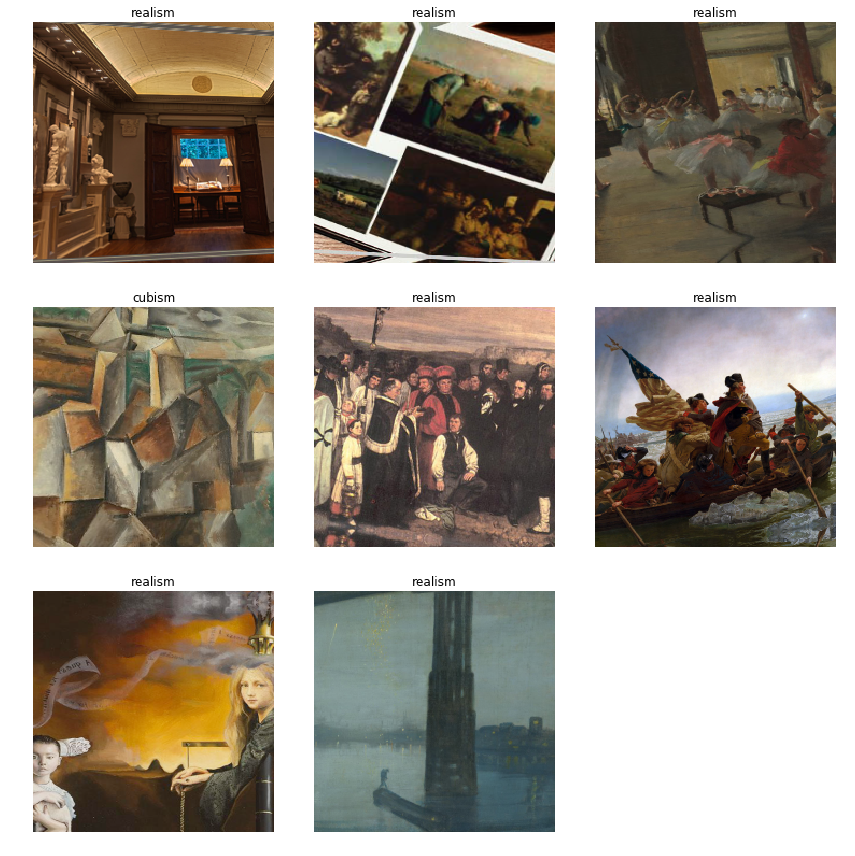

In [4]:
data.show_batch(3)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [6]:
learn.fit_one_cycle(5, 1e-3)

In [0]:
learn.unfreeze()

In [9]:
learn.fit_one_cycle(5, slice(1e-6,1e-4))

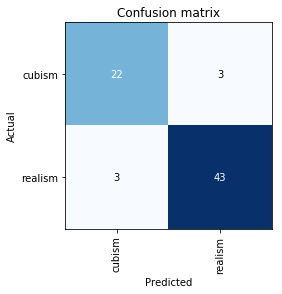

In [13]:
interp.plot_confusion_matrix()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

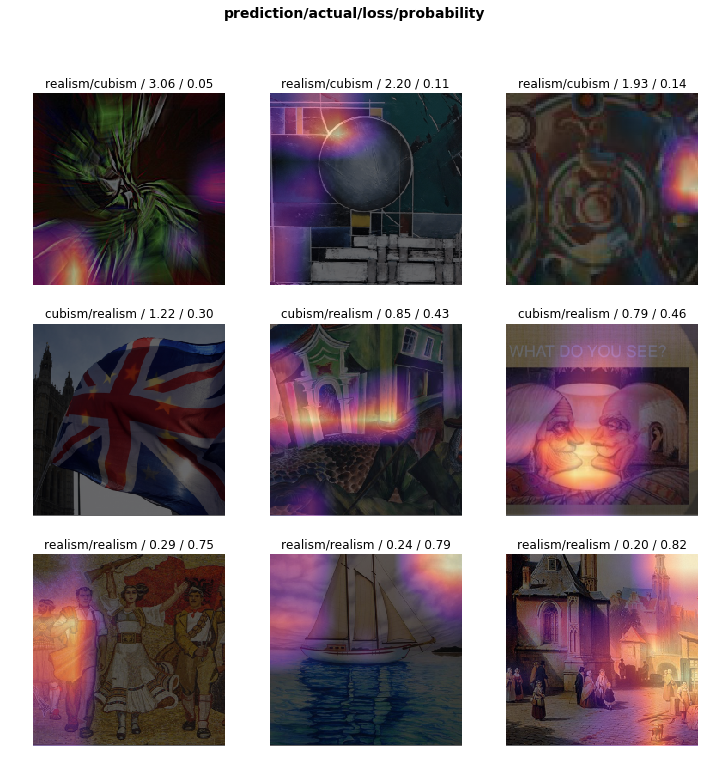

In [11]:
interp.plot_top_losses(9)